# [Altair](https://altair-viz.github.io/) is a declarative statistical visualization library for Python

* API for grammar of graphics (like ggplot2 )
* based on powerful stack of [Vega-Lite](https://vega.github.io/vega-lite/)/[Vega](https://vega.github.io/vega/)/[d3.js](https://d3js.org/)
* with interactive graphics support

* 40 lines of Python code with Altair and World Bank data [link](#40_lines)

In [1]:
#hide
import pandas as pd
print ('pandas',pd.__version__)

import altair as alt
print ('altair',alt.__version__)

# for jupyter notebook  (jupyterLab)
alt.renderers.enable('notebook')
# for colab
#alt.renderers.enable('colab')

# pip install altair_data_server
alt.data_transformers.enable('data_server')


from IPython.display import display, HTML,Markdown ,YouTubeVideo
import io
import re
import os
import json


pandas 0.24.1
altair 2.4.1


### Approaches to visualization tool design 

* **Imperative**: matplolib
* **Template**: Seaborn, plotly 
* **Grammar of Graphics**: ggplot2 (R), plotnine, Altair (Vega-Lite)

## We need a good example 

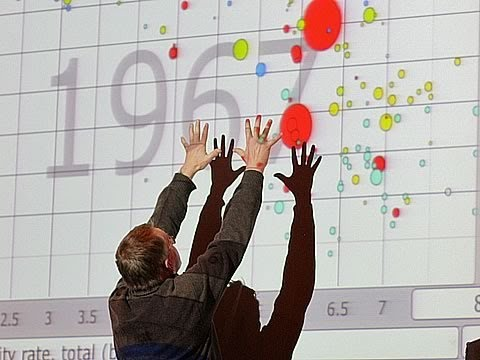

#### Hans Rosling several myths about world development TED

In [2]:
display(Markdown("## We need a good example "))
display(YouTubeVideo('hVimVzgtD6w',start=204,width=800,height=600))
display(Markdown("#### Hans Rosling several myths about world development TED"))

In [36]:
"""
#skip it. It's a dataset preparation
#data from worldbank
#https://databank.worldbank.org/data/LifeAndIncome/id/24df519a
df_data = pd.read_csv ("data/LifeAndIncome_Data.csv")#parse_dates=["Time"]
df_data =  df_data.set_index(['Country Code','Time','Series Name'])['Value'].dropna().unstack('Series Name')
#http://databank.worldbank.org/data/download/site-content/CLASS.xls
df_class = pd.read_excel(
              io = 'data/class.xls',
              sheet_name='List of economies',
              header=4,index_col=0,skiprows=[5],
              usecols=[0,2,3,5,6,7,8],nrows=218
             )
#https://datahub.io/core/country-codes/r/country-codes.csv
df_country = pd.read_csv ("data/country-codes_csv.csv")
df_country = df_country.merge(df_class,how='left',left_on="ISO3166-1-Alpha-3",right_on="Code")
df_country = df_country[[
    'ISO3166-1-Alpha-3',
    'ISO3166-1-numeric',
    'CLDR display name',
    'Economy',
    'Sub-region Name',
    'Intermediate Region Name',
    'Region Name',
    'Region',
    'Income group'
]]

df_data = df_data.reset_index().merge(df_country,
                                      left_on='Country Code',right_on='ISO3166-1-Alpha-3',how='inner')
df_data_vis =  df_data_vis = df_data[
    ['Life expectancy at birth, total (years)',
     'Population, total',
     'Fertility rate, total (births per woman)',
     'CLDR display name',
     'Region Name',
     'Region',
     'Time',
     'ISO3166-1-numeric'
    ]].rename(columns={
    'Life expectancy at birth, total (years)':'Life expectancy',
    'Population, total':'Population',
    'Fertility rate, total (births per woman)':'Fertility rate',
    'CLDR display name':'Country',
    'Region':'WB Region',
    'Region Name':'Region',
    'Time':'Year',
    'ISO3166-1-numeric':'MapCode'
       
})

df_data_vis['Year']=df_data_vis.Year.astype(int)
df_data_vis['MapCode']=df_data_vis.MapCode.astype(int)
df_data_vis['WB Region']=df_data_vis['WB Region'].fillna('Not listed')
df_data_vis.to_csv("word_bank.csv",index=False)
"""
df_data_vis = pd.read_csv("word_bank.csv")
df_data_vis.head()

,Life expectancy,Population,Fertility rate,Country,Region,WB Region,Year,MapCode
0,65.022,20619075.0,3.109,Argentina,Americas,Latin America & Caribbean,1960,32
1,65.141,20953077.0,3.100,Argentina,Americas,Latin America & Caribbean,1961,32
2,65.233,21287682.0,3.089,Argentina,Americas,Latin America & Caribbean,1962,32
3,65.311,21621840.0,3.078,Argentina,Americas,Latin America & Caribbean,1963,32
4,65.388,21953929.0,3.068,Argentina,Americas,Latin America & Caribbean,1964,32


In [39]:

#alt.data_transformers.enable('data_server')
alt.data_transformers.enable('json')

DataTransformerRegistry.enable('json')

## 40 lines of Python code with Altair and World Bank data <a name='40_lines'></a>

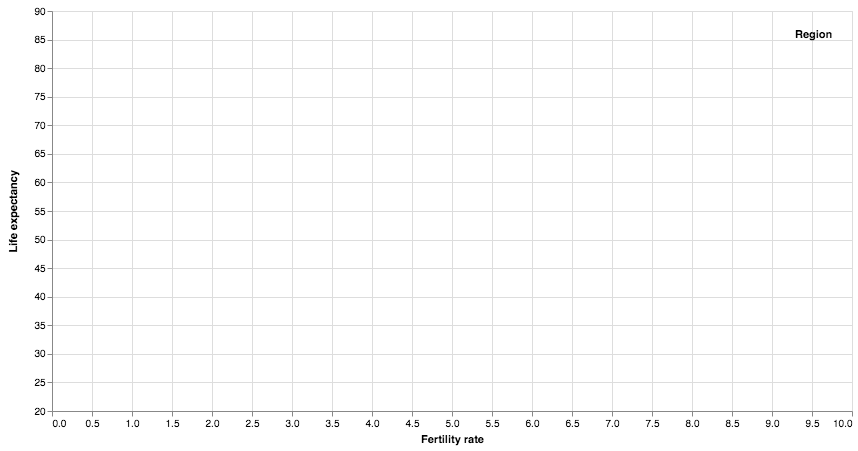

In [40]:
base_bubles = (
    alt.Chart()
    .mark_circle(stroke='white', strokeWidth=1)
    .encode(
        alt.X('Fertility rate', scale=alt.Scale(domain=[0, 10])),
        alt.Y('Life expectancy', scale=alt.Scale(domain=[20, 90])),
        alt.Size('Population', legend=None, scale=alt.Scale(range=[20, 10000])),
        alt.Fill('Region', legend=alt.Legend(orient='top-right')),
        alt.Tooltip('Country'),
    )
)

year_input = alt.binding_range(min=1960, max=2016, step=1)
year_sel = alt.selection_single(
    bind=year_input, fields=['Year'], name="Select", empty='none'
)
country_sel_hist = alt.selection_multi(on='mouseover', fields=['Country'], empty='none')
country_sel = alt.selection_single(on='mouseover')

bubles_full = alt.layer(
    (
        base_bubles.add_selection(year_sel)
        .mark_circle(strokeWidth=0, opacity=0.1)
        .encode(alt.Fill('Region', legend=None))
        .transform_filter(country_sel_hist)
    ),
    (
        base_bubles.transform_filter(year_sel)
        .add_selection(country_sel_hist)
        .add_selection(country_sel)
        .interactive()
        .encode(
            opacity=alt.condition(
                country_sel, alt.value(0.9), alt.value(0.5)
            )
        )
    ),
    data=df_data_vis,
).properties(width=800, height=400)
bubles_full

Select Time to see distribution.
Click a bubble to see the path. 

In [6]:
bubles_full.save('demo.html')

demo.html online on my [github.io](https://iliatimofeev.github.io/PyData2019Atlair/demo.html)

## Atair Python API for Vega-Lite 

* **Grammar of Graphics**

    * **data**
    * transformation
    * **mark-type**
    * **encodings**

* **View Composition Algebra**
* **Grammar of interaction**

#### Vega-Lite by autors : Vega Lite: A Grammar of Interactive Graphics - Wongsuphasawat, Moritz, and Satyanarayan [Open Viz Conf 2017](https://youtu.be/9uaHRWj04D4)

## Grammar of Graphics. 
### data

In [7]:
print(df_data_vis.shape)
df_data_vis.sample(5)

(12375, 8)


,Life expectancy,Population,Fertility rate,Country,Region,WB Region,Year,MapCode
1561,75.892000,97824.0,2.089,Antigua & Barbuda,Americas,Latin America & Caribbean,2013.0,28.0
2651,75.425000,340117.0,2.119,Brunei,Asia,East Asia & Pacific,2001.0,96.0
7086,71.735366,3179041.0,2.410,Lithuania,Europe,Europe & Central Asia,1971.0,440.0
11607,NaN,7616.0,NaN,Tuvalu,Oceania,East Asia & Pacific,1974.0,798.0
5793,83.480488,7150100.0,1.285,Hong Kong,Asia,East Asia & Pacific,2012.0,344.0


## Grammar of Graphics <a name="gg"></a>

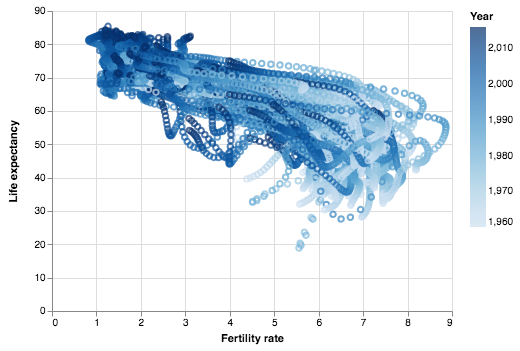

In [8]:
( 
    alt.Chart( data = df_data_vis) #<--- data
    .mark_point()                  #<--- mark-type
    .encode(                       #<--- encoding
        x = 'Fertility rate',
        y = 'Life expectancy',
        color = 'Year'
      
    )
    
)


## Grammar of Graphics Basics <a name="gg_basics"></a>

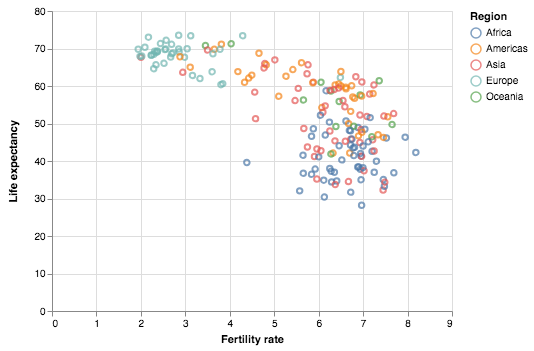

In [9]:
from altair.expr import datum
( 
    alt.Chart( data = df_data_vis) #<--- data
    .transform_filter(datum.Year == 1960) #<--- transformation
    .mark_point()                  #<--- mark-type
    .encode(                       #<--- encoding
        x = 'Fertility rate', #<--- automatic data-type: quantitative
        y = 'Life expectancy',  #<--- automatic data-type: quantitative
        color = 'Region'                           #<--- automatic data-type: nominal
      
    )
)


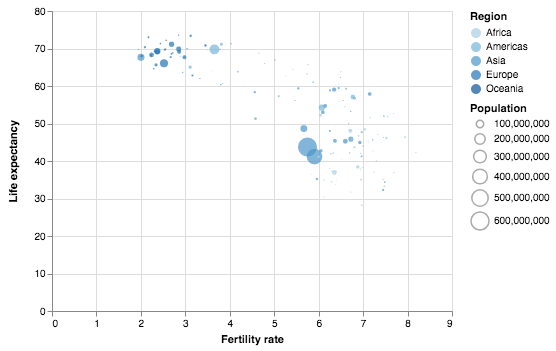

In [10]:
( 
    alt.Chart( data = df_data_vis) 
    .transform_filter(datum.Year == 1960) 
    .mark_circle()                  #<--- new mark-type
    .encode(                       #<--- encoding
        x = 'Fertility rate', #<--- automatic data-type: ordinal quantitative
        y = 'Life expectancy',  #<--- automatic data-type: ordinal quantitative
        size = 'Population', #<--- automatic data-type: quantitative 
        color = 'Region:O', #<--- data-type: ordinal -> deferent default color scheme
      
    )
    
)


## Grammar of Graphics Encoding <a name="gg_encoding"></a>


### encodings

   * **channel**: x, y, x2, y2,color, opacity, shape, size, text, tooltip, href...
   *  shorthand
       * **field**(reference to data) | value
       * **data-type**: nominal, ordinal, quantitative, temporal
       * aggregate: sum, count, mean, median, q1, q3, stdev, ets.
   * **functions**: aggregate, bin, sort, stack, *condition*,...      
   * **scale**: Continuous, Discrete, Discretizing      
   * **guide**: axis, legend
   
Defaults are reasonable  (more than based on scientific research [] ), but we have control.

## Grammar of Graphics Field Type <a name="gg_type"></a>


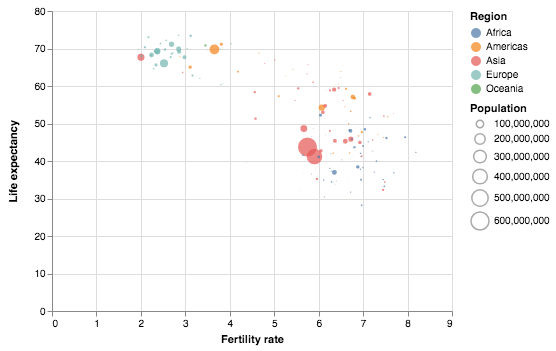

In [11]:
 (
    alt.Chart( data = df_data_vis) #<--- data
    .transform_filter(datum.Year == 1960)
    .mark_circle() #<--- mark properties
    .encode(
        x = alt.X('Fertility rate'),
        y = alt.Y(
            shorthand ='Life expectancy:Q', #<--- shorthand
        ),
        size = alt.Size(                       #<--- notation without shorthand 
            field = 'Population',       #<--- data column
            type = 'quantitative',             #<--- data type           
        ),
        color = alt.Color('Region:N'),
    )
 )

## Grammar of Graphics Scale <a name="gg_scale"></a>


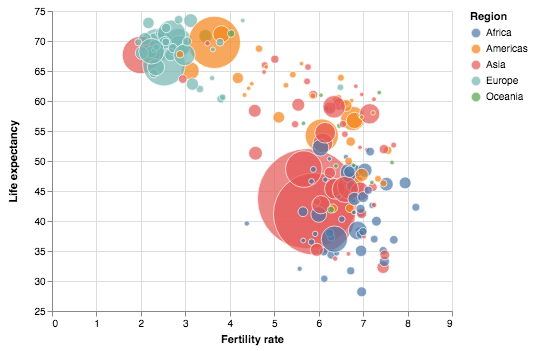

In [12]:
 (
    alt.Chart( data = df_data_vis) 
    .transform_filter(datum.Year == 1960)
    .mark_circle(stroke ='white',strokeWidth =1) #<--- mark properties
    .encode(
        x = alt.X('Fertility rate'),
        y = alt.Y(
            shorthand ='Life expectancy:Q', 
            scale = alt.Scale(zero=False),     #<--- allow exclude zero from axis 
        ),
        size = alt.Size(                       
            field = 'Population',       
            type = 'quantitative',                      
            legend=None,                       #<--- switch of guide (legend)
            scale = alt.Scale(range=[20,10000])#<--- explicit setup of scale output for bigger mark sizes 
        ),
        fill = alt.Fill('Region'),             #<--- Fill 
    )
 )

###  Grammar of Graphics Final <a name="gg_scale"></a>

We finish the basics of encoding and some element of control 
Aggregation and Binnig still uncovered.

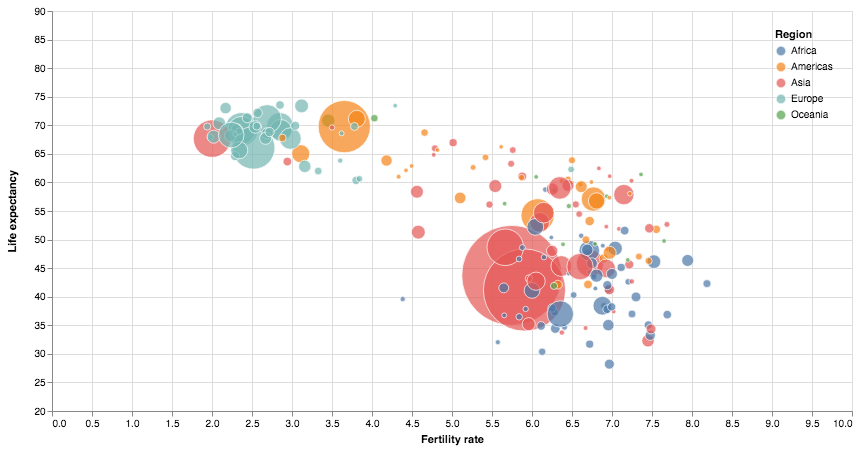

In [13]:
(
    alt.Chart(data=df_data_vis)
    .transform_filter(datum.Year == 1960)
    .mark_circle(stroke='white', strokeWidth=1)
    .encode(
        alt.X(
            shorthand='Fertility rate',
            scale=alt.Scale(domain=[0, 10]),  # <--- explicit scale input range
        ),
        alt.Y(
            shorthand='Life expectancy',
            scale=alt.Scale(
                domain=[20, 90]
            ),  # <--- to compare charts on different years
        ),
        alt.Size(
            shorthand='Population',
            legend=None,  # <--- switch of guide (legend)
            scale=alt.Scale(
                range=[20, 10000]
            ),  # <--- explicit setup of scale output for bigger mark sizes
        ),
        alt.Fill(
            'Region', legend=alt.Legend(orient='top-right')
        ),  # <--- set params of guide (legend)
        alt.Tooltip('Country'),  # <--- special channel for tooltips
    )
    .properties(width=800, height=400)  # <--- View options
)#.save('base_gg.png', scale_factor=4)

 ###  View Composition Algebra

* **layer**
* (h|v)concat
* facet
* repeat

###  Layer: Prepare <a name="gg_layer_prepare"></a>


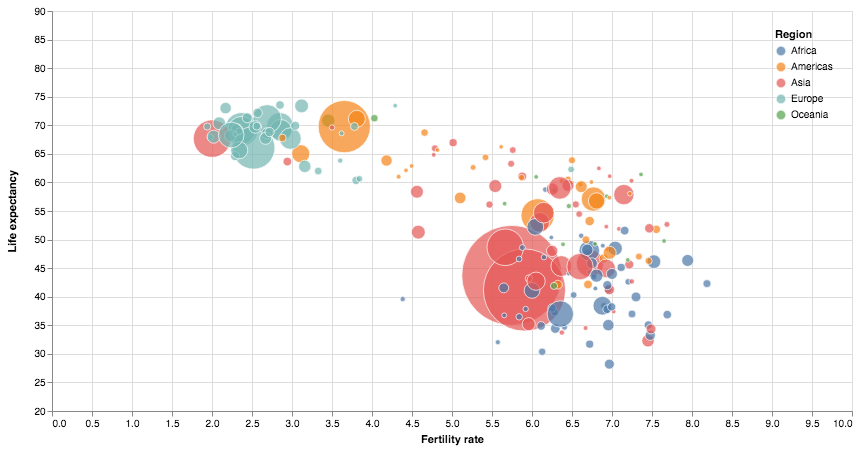

In [14]:
base_bubles = (
    alt.Chart(data = df_data_vis) 
    #.transform_filter(datum.Year == 1960) # <-remove filter
    .mark_circle(stroke ='white',strokeWidth =1) 
    .encode(
        alt.X(
              shorthand = 'Fertility rate',
              scale = alt.Scale(domain = [0,10]), 
        ),
        alt.Y(
              shorthand = 'Life expectancy',
              scale = alt.Scale(domain = [20,90])  
        ),
        alt.Size(                      
            shorthand ='Population',   
            legend=None,                       
            scale = alt.Scale(range=[20,10000])
        ),
        alt.Fill('Region',legend = alt.Legend(orient='top-right')),
        alt.Tooltip('Country'), 
    )
    .properties(width = 800,height=400) 
)
    
base_bubles.transform_filter(datum.Year == 1960) # <-set filter

###  Layer <a name="gg_layer"></a>


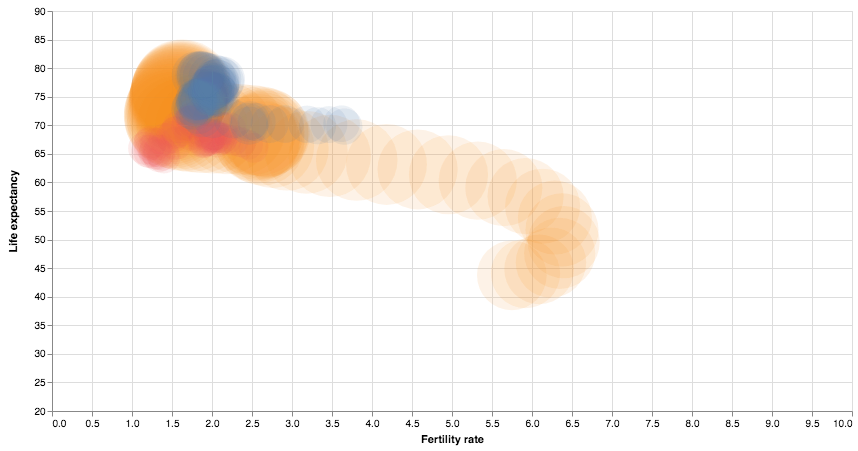

In [15]:
bubles_history = (
    base_bubles
    .mark_circle(strokeWidth =0,opacity =0.1)
    .encode(alt.Fill('Region',legend=None))
    .transform_filter(alt.FieldOneOfPredicate(field='Country',oneOf=['Russia','US','China']))
)
bubles_history

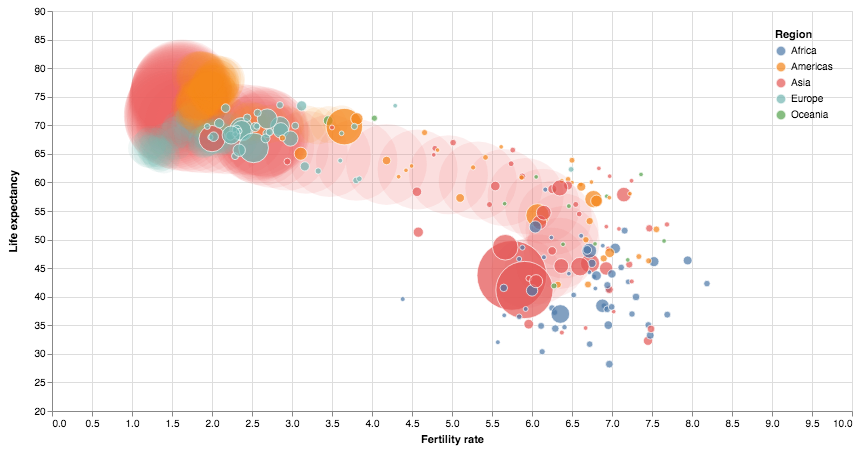

In [16]:
bubles = base_bubles.transform_filter(datum.Year == 1960)
alt.layer(bubles_history,bubles) # bubles_history+bubles will work to


### Vega-Lite  grammar of  interaction 

* **selection**
    * type
    * event
    * projection
    * binding
* condition
* predicat selected
* domain

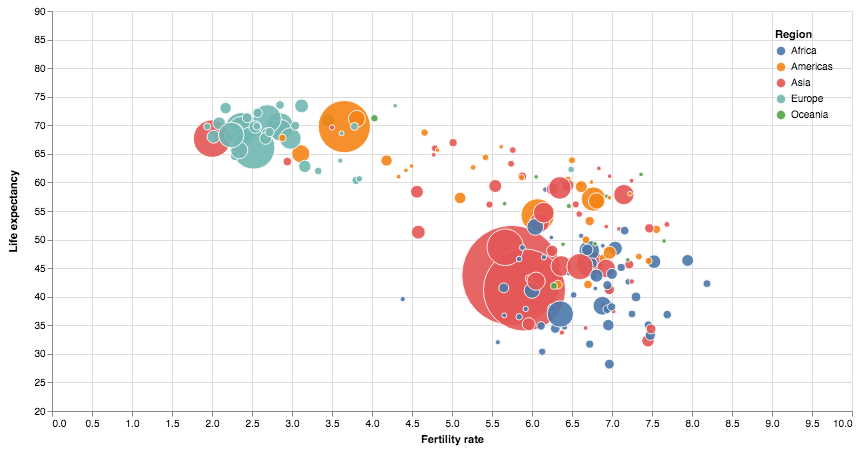

In [17]:
country_sel = alt.selection_single(  # <--- selection type
    on='mouseover'  # <--- event
)
(
    base_bubles.transform_filter(datum.Year == 1960)
    .add_selection(country_sel)
    .interactive()
    .encode(
        opacity=alt.condition(
            country_sel, alt.value(0.9), alt.value(0.3)
        )  # <- reaction
    )
)


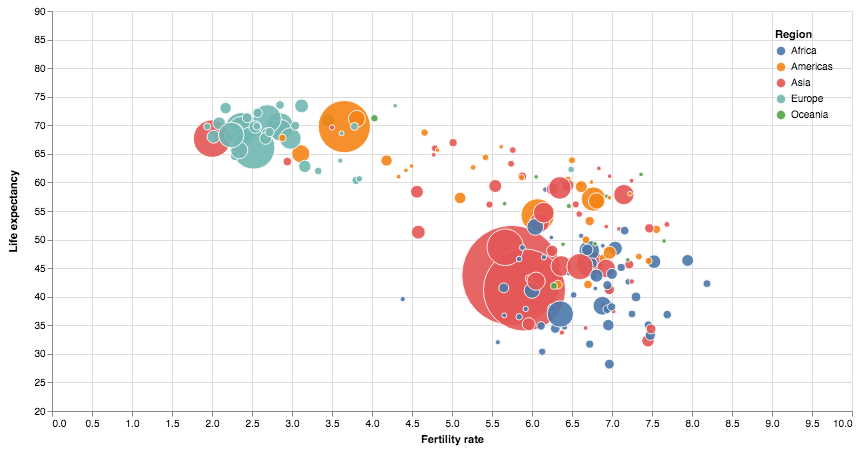

In [18]:
alt.data_transformers.enable('data_server')
country_sel = alt.selection_single(on='mouseover')
country_sel_hist = alt.selection_multi(
    on='mouseover', empty='none', fields=['Country']
)

alt.layer(  # <--- composition
    (
        base_bubles.mark_circle(strokeWidth=0, opacity=0.1)
        .encode(alt.Fill('Region', legend=None))
        .transform_filter(
            country_sel_hist
        )  # <--- works as filter on diferent layer
    ),
    (
        base_bubles.transform_filter(datum.Year == 1960)
        .add_selection(country_sel_hist)
        .add_selection(country_sel)
        .interactive()  # <--- adds selections binded to axis-> chart is zoomable
        .encode(
            opacity=alt.condition(
                country_sel, alt.value(0.9), alt.value(0.5)
            )
        )
    ),
)


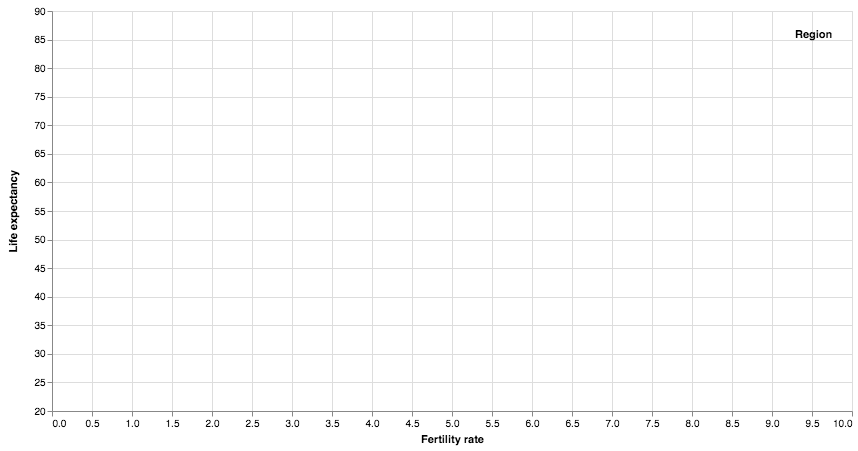

In [19]:
alt.data_transformers.enable('data_server') #"init":{"Year":1960} #3.0.0-rc14

country_sel = alt.selection_single(on='mouseover')
country_sel_hist = alt.selection_multi(
    on='mouseover', empty='none', fields=['Country']
)
year_input = alt.binding_range(min=1960, max=2016, step=1)
year_selection = alt.selection_single(bind=year_input, fields=['Year'], name="Select",empty='none')
alt.layer( #<--- composition
    (
        base_bubles
        .add_selection(year_selection)
        .mark_circle(strokeWidth =0,opacity =0.1)
        .encode(alt.Fill('Region',legend=None))
        .transform_filter(country_sel_hist) 
    ),
    (
        base_bubles
        .transform_filter(year_selection)
        .add_selection(country_sel_hist)
        .add_selection(country_sel)
        .interactive() 
        .encode(
            opacity = alt.condition(country_sel,alt.value(0.9),alt.value(0.3))
        )   
    )
)# .save('demo.html')

### Uganda where is it?

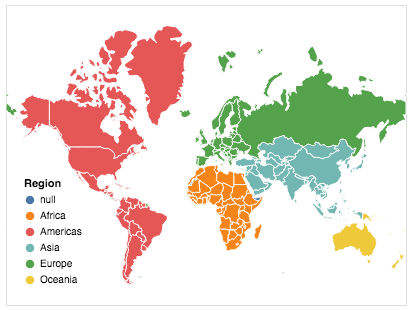

In [20]:
from vega_datasets import data

base_map = (
    alt.Chart(data = alt.topo_feature(data.world_110m.url, 'countries')) # <-- topojson as data
    .mark_geoshape(stroke='white',) # <-- mark type: geoshape 
    .encode(
      alt.Fill('Region:N',legend=alt.Legend(orient='bottom-left')),
      alt.Tooltip('Country:N')
    )
    .project('mercator') # <-- geo need to be pojected
    .transform_filter('datum.id!=10') # <-- we don need antarctida
    .transform_lookup( # <-- LEFT JOIN
        lookup='id',
        from_=alt.LookupData( #<-- our base data
            data = df_data_vis, #<-- index in left (main) table
            key = 'MapCode', #<-- index in right table
            fields = ['Region','Country'], #<-- fiels to join
        )
    )
                     
)
base_map.properties(width=400,height=300)

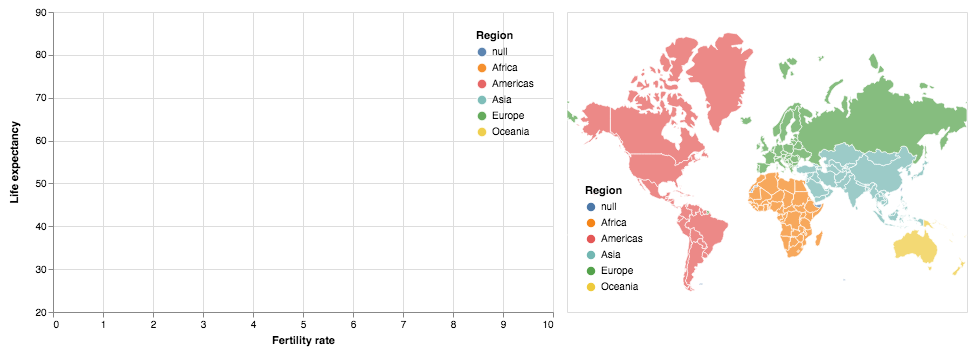

In [22]:
map_bubles = alt.hconcat(   #<--- composition of view 
    alt.layer( #<--- composition
      (
            base_bubles
            .mark_circle(strokeWidth =0,opacity =0.1)
            .encode(alt.Fill('Region',legend=None))
            .properties(width=500,height=300)
            .transform_filter(country_sel_hist) #<--- works as filter on diferent layer
            .add_selection(year_selection)
        ),
        (
            base_bubles
            .transform_filter(year_selection)
            .add_selection(country_sel_hist)
            .add_selection(country_sel)
            .interactive() 
            .encode(
                opacity = alt.condition(country_sel,alt.value(0.9),alt.value(0.3))
            )   

        ),
  

    ),
     (
         base_map
         .encode(
             fill = alt.condition(
                     predicate = country_sel_hist,
                     if_false=alt.Fill('Region:N',legend=alt.Legend(orient='bottom-left')),
                     if_true=alt.value('gray')
             ),
             stroke = alt.condition(
                     predicate = country_sel_hist,
                     if_false=alt.value('white'),
                     if_true=alt.value('gray')
             ),
 
             opacity = alt.condition(country_sel_hist,alt.value(1),alt.value(.7)),
         )
         .properties(width=400,height=300)
     )
 )
map_bubles

In [23]:
map_bubles.save('demo2.html')